In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pandas_datareader as web
import datetime as dt

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM

In [ ]:
# Загрузка данных
import yfinance as yf
import datetime as dt

company = 'BMW.DE'

start = dt.datetime(2020, 1, 1)
end = dt.datetime(2024, 1, 1)

data = yf.download(company, start=start, end=end)

[*********************100%%**********************]  1 of 1 completed


In [ ]:
# Подготовка данных
scaler = MinMaxScaler(feature_range = (0, 1))
scaled_data = scaler.fit_transform(data['Close'].values.reshape(-1, 1))

prediction_days = 60

x_train = []
y_train = []

for x in range(prediction_days, len(scaled_data)):
  x_train.append(scaled_data[x-prediction_days:x, 0])
  y_train.append(scaled_data[x, 0])

x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [ ]:
# Строим модель
model = Sequential()

model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=25, batch_size=32)

Epoch 1/25
30/30 [==============================] - 9s 118ms/step - loss: 0.0577
Epoch 2/25
30/30 [==============================] - 3s 88ms/step - loss: 0.0091
Epoch 3/25
30/30 [==============================] - 2s 78ms/step - loss: 0.0065
Epoch 4/25
30/30 [==============================] - 2s 78ms/step - loss: 0.0073
Epoch 5/25
30/30 [==============================] - 2s 80ms/step - loss: 0.0067
Epoch 6/25
30/30 [==============================] - 3s 104ms/step - loss: 0.0066
Epoch 7/25
30/30 [==============================] - 3s 103ms/step - loss: 0.0063
Epoch 8/25
30/30 [==============================] - 2s 79ms/step - loss: 0.0054
Epoch 9/25
30/30 [==============================] - 2s 78ms/step - loss: 0.0054
Epoch 10/25
30/30 [==============================] - 2s 77ms/step - loss: 0.0050
Epoch 11/25
30/30 [==============================] - 3s 90ms/step - loss: 0.0062
Epoch 12/25
30/30 [==============================] - 3s 115ms/step - loss: 0.0055
Epoch 13/25
30/30 [==============

In [ ]:
# Загружаем тестовые данные
test_start = dt.datetime(2023,1,1)
test_end = dt.datetime.now()

test_data = yf.download(company, start=test_start, end=test_end)
actual_prices = test_data['Close'].values

total_dataset = pd.concat((data['Close'], test_data['Close']), axis=0)

model_inputs = total_dataset[len(total_dataset) - len(test_data) - prediction_days:].values
model_inputs = model_inputs.reshape(-1,1)
model_inputs = scaler.transform(model_inputs)

[*********************100%%**********************]  1 of 1 completed


8/8 [==============================] - 1s 23ms/step


<function matplotlib.pyplot.show(close=None, block=None)>

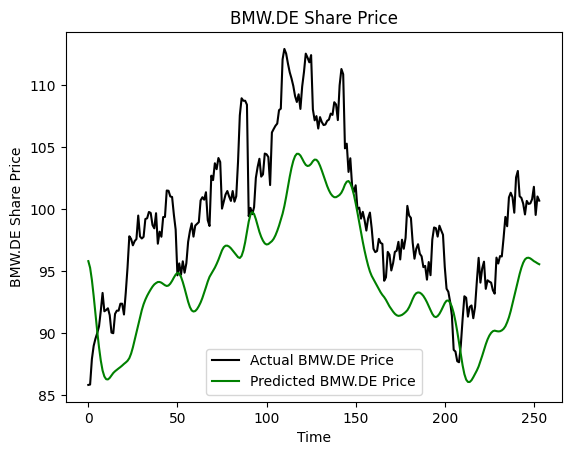

In [ ]:
# Сделаем прогноз на тестовых данных
x_test = []

for x in range(prediction_days, len(model_inputs)):
  x_test.append(model_inputs[x-prediction_days:x, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

predicted_prices = model.predict(x_test)
predicted_prices = scaler.inverse_transform(predicted_prices)

# График тестового прогноза
plt.plot(actual_prices, color="black", label=f"Actual {company} Price")
plt.plot(predicted_prices, color='green', label=f"Predicted {company} Price")
plt.title(f"{company} Share Price")
plt.xlabel('Time')
plt.ylabel(f'{company} Share Price')
plt.legend()
plt.show

In [ ]:
# Прогноз следующего дня
real_data = [model_inputs[len(model_inputs) + 1 - prediction_days:len(model_inputs+1), 0]]
real_data = np.array(real_data)
real_data = np.reshape(real_data, (real_data.shape[0], real_data.shape[1],1))

prediction = model.predict(real_data)
prediction = scaler.inverse_transform(prediction)
print(f"Prediction: {prediction}")

1/1 [==============================] - 1s 1s/step
Prediction: [[95.476875]]
